In [1]:
import pandas as pd
dataset=pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [2]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [3]:
dataset['salary']=dataset['salary'].fillna(0)

In [4]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [5]:
dataset=dataset.drop(columns=['sl_no'])

In [6]:
dataset


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


Reason for Non-Placement

In [7]:
placed_acad_mean=(dataset[dataset['status']=='Placed'][['ssc_p','hsc_p','degree_p']].mean(axis=1).mean())
notplaced_acad_mean=(dataset[dataset['status']=='Not Placed'][['ssc_p','hsc_p','degree_p']].mean(axis=1).mean())

print("Placed students academic mean: ",placed_acad_mean," \n Non-Placed students academic mean: ",notplaced_acad_mean)

Placed students academic mean:  70.12952702702702  
 Non-Placed students academic mean:  59.024577114427856


Relationship between salary and mba_p

In [8]:
dataset[['salary','mba_p']].corr()

,salary,mba_p
salary,1.000000,0.139823
mba_p,0.139823,1.000000


Minimum Salary

In [9]:
p_df=dataset[dataset['status']=='Placed']
p_df.groupby('specialisation')['salary'].mean()

specialisation
Mkt&Fin    298852.631579
Mkt&HR     270377.358491
Name: salary, dtype: float64

Salary above 500000

In [10]:
sal=dataset[dataset['salary']>500000]
print("Number of Students getting above 500000 salaries are",sal['salary'].count())

Number of Students getting above 500000 salaries are 3


ANOVA

In [11]:
import scipy.stats as stats
etest=dataset['etest_p']
mba=dataset['mba_p']
res=stats.f_oneway(etest,mba)

In [12]:
print(f"{res.pvalue:.20f}")

0.00000000000000000000


Null hypothesis - There is no significant difference between etest_p and mba_p

Alternate hypothesis - There is significant difference between etest_p and mba_p


pvalue<0.05, so reject null hypothesis and accept alternate hypothesis

T-Test - Unpaired T test

In [13]:
from scipy.stats import ttest_ind
deg=dataset[dataset['degree_t']=='Sci&Tech']['salary']
spec=dataset[dataset['specialisation']=='Mkt&HR']['salary']
res=ttest_ind(deg,spec)
print(f"{res.pvalue:.20f}")

0.00789796994347117913


Null hypothesis - There is no similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary

Alternate hypothesis - There is similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary 

pvalue<0.05, so reject null hypothesis and accept alternate hypothesis



Standard Normal Distribution

In [14]:
mean=dataset['salary'].mean()
std=dataset['salary'].std()
z_score=[((j-mean)/std) for j in dataset['salary']]
stddf=pd.DataFrame({'salary normal distribution':dataset['salary'],'salary standard normal distribution':z_score})
stddf


,salary normal distribution,salary standard normal distribution
0,270000.0,0.460636
1,200000.0,0.008384
2,250000.0,0.331421
3,0.0,-1.283765
4,425000.0,1.462051
...,...,...
210,400000.0,1.300533
211,275000.0,0.492940
212,295000.0,0.622155
213,204000.0,0.034227


Probability Density function

In [15]:
from scipy.stats import norm
#generate sample
sample=dataset['salary']
start=700000
end=900000
#calculating parameters
sample_mean=sample.mean()
sample_std=sample.std()
print("Mean= %3f, Standard Deviation= %3f" % (sample_mean,sample_std))
#define distribution
dist=norm(sample_mean,sample_std)
#sample probabilities for a range of outcomes
values=[value for value in range(start,end)]
probabilities=[dist.pdf(value) for value in values]
prob=sum(probabilities)
print("The area of between range[{},{}]:{}".format(start,end,prob))


Mean= 198702.325581, Standard Deviation= 154780.926716
The area of between range[700000,900000]:0.0005973310593974868


T-Test Paired T Test

In [16]:
from scipy.stats import ttest_rel
ep=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
mp=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
res=ttest_rel(ep,mp)
print(f"{res.pvalue:.20f}")

0.00000551792060050539


Null hypothesis - There is no similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p 

Alternate hypothesis - There is similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p  

pvalue<0.05, so reject null hypothesis and accept alternate hypothesis


correlated

In [17]:
dataset.select_dtypes(include='number').corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


Graph

C:\Users\Jayashree M\AppData\Local\Temp\ipykernel_7492\1584261423.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(sample,kde=True,kde_kws={'color':'blue'}, color={'Green'})


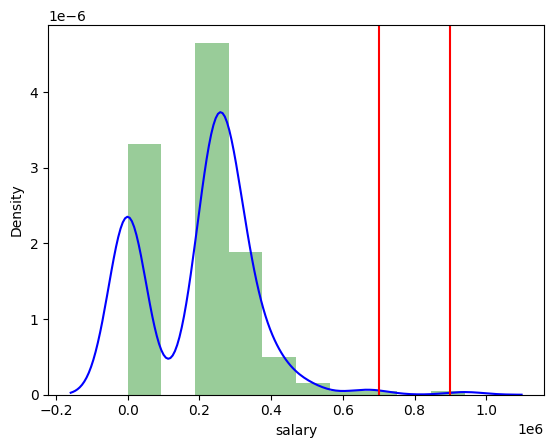

In [18]:
import seaborn as sns
from matplotlib import pyplot
ax=sns.distplot(sample,kde=True,kde_kws={'color':'blue'}, color={'Green'})
pyplot.axvline(start,color='Red')
pyplot.axvline(end,color='Red')

In [19]:
corr=dataset.select_dtypes(include='number').corr()


In [20]:
corr.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

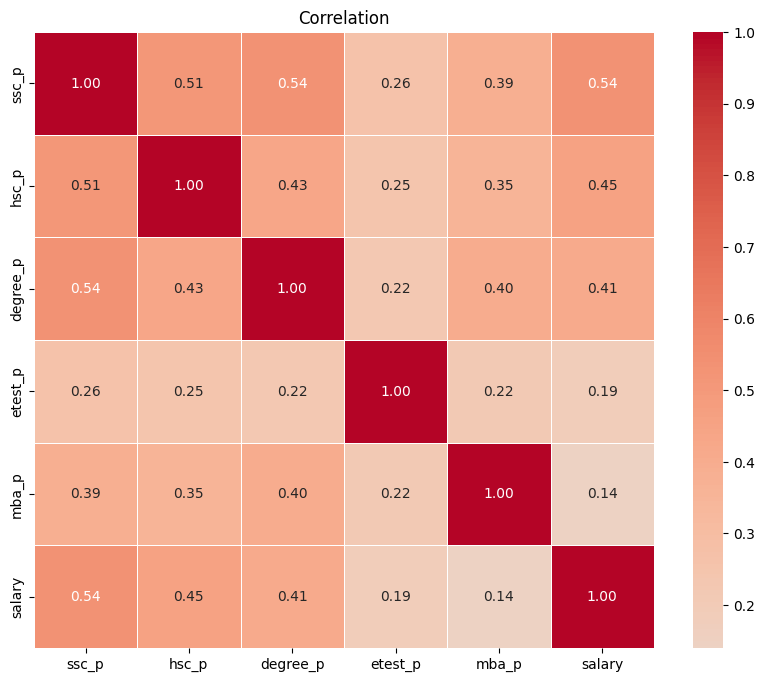

In [22]:
corr_matrix=pd.DataFrame(corr,columns=corr.columns,index=corr.columns)
pyplot.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=.5, center=0)
pyplot.title('Correlation')
pyplot.show()